In [3]:
#Лаба 1. Линейная регрессия 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
#считываем csv файл
data = pd.read_csv("student_scores.csv")
#выводим основную информацию по каждому из столбцов
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Введите номер столбца(1 или 2), который будет выбран в качестве X: 


 1


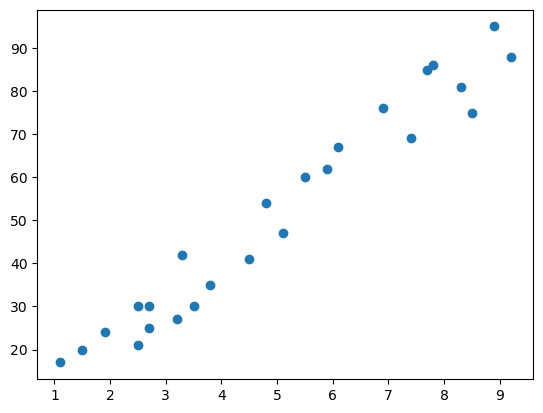

In [7]:
#с помощью matplotlib выведем точки:
print("Введите номер столбца(1 или 2), который будет выбран в качестве X: ")
num = int(input())
if(num == 1):
    X, y = data.iloc[:,0], data.iloc[:,1]
elif(num == 2):
    X,y = data.iloc[:,1], data.iloc[:,0]
else: print('Некорректный ввод')

plt.scatter(X,y)

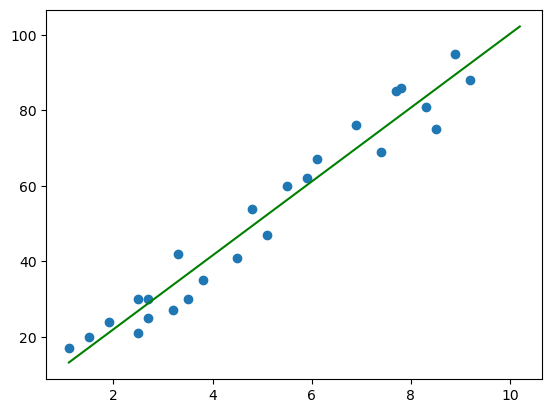

In [9]:
#реализуем метод наименьших квадратов и вычислим параметры регрессионной прямой 
X_mean = X.mean()
y_mean = y.mean()
cov = 0
S = 0
for i in range(X.size):
    cov += (X.iloc[i]-X_mean)*(y.iloc[i]-y_mean)
    S += (X.iloc[i]-X_mean)**2
b_1 = cov/S
b_0 = y_mean - b_1*X_mean

reg = lambda x: b_0 + x*b_1 # полученное уравнение регрессии


#выведем регруссионную прямую 

x_ = np.linspace(X.min(),X.max()+1)
y_ = reg(x_)

plt.scatter(X,y)
plt.plot(x_,y_,color="green")

[ -5.92318188  -5.3402707   -6.76624426 -10.57800223  -6.69898527
   2.85262151  -4.4210646    3.74940795  -2.62284155  -3.87834256
   7.24264049   1.83908659  -5.47478866   7.25617541   3.76294286
   5.51167642   3.07681812   2.94230015   4.88392591  -5.8246185
   1.12165744   4.59247032  -4.63172629   6.0632832    7.26506015]


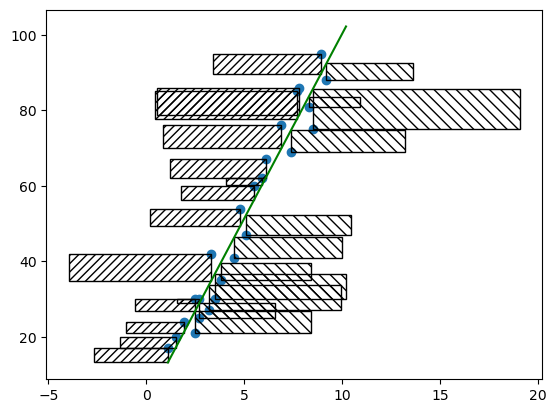

In [43]:
#найдём квадраты ошибок
e = np.array([])
for i in range(X.size):
    e = np.append(e,(y[i] - reg(X[i])))
print(e)


fig, ax = plt.subplots()
plt.scatter(X,y)
plt.plot(x_,y_,color="green")
for i in range(X.size):
    if(y[i]>reg(X[i])): 
        ax.add_patch(Rectangle((X[i]-e[i],y[i]-e[i]),e[i],e[i], fill = 0, hatch = '////'))
    else:
        ax.add_patch(Rectangle((X[i],y[i]),abs(e[i]),abs(e[i]),fill = 0,hatch = '\\\\\\'))


#Выводятся, конечно, не квадраты - оси разного масштаба, поэтому квадраты становятся прямоугольниками. 
#Если посмотреть на всё это при нормальном масштабе, то будут именно квадраты. 